### MLP

#### Part 1 Implementaion

In [1]:
import numpy as np
import keras
from keras.datasets import mnist 
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2

(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [3]:
from keras.utils import np_utils
newX_train = X_train.reshape(X_train.shape[0], 784)
newX_test = X_test.reshape(X_test.shape[0], 784) 
newX_train = newX_train.astype('float32')
newX_train /= 255
newX_test = newX_test.astype('float32')
newX_test /= 255
Y_train = keras.utils.np_utils.to_categorical(Y_train, 10)
Y_test = keras.utils.np_utils.to_categorical(Y_test, 10)

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Activation
model = Sequential()
model.add(Dense(512, activation='relu', input_shape=(784,)))
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dense(10, activation="softmax"))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 512)               401920    
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_1 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation (Activation)     (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 671,754
Trainable params: 670,730
Non-trainable params: 1,024
____________________________________________

In [10]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [11]:
history = model.fit(newX_train[:6000], Y_train[:6000], batch_size=32, validation_data=(newX_test[:1000],Y_test[:1000]), epochs=20, verbose=1)
model.evaluate(newX_test[:1000], Y_test[:1000], batch_size=32)

Epoch 1/20
188/188 [==============================] - 3s 13ms/step - loss: 0.4108 - accuracy: 0.8725 - val_loss: 0.4014 - val_accuracy: 0.9120
Epoch 2/20
188/188 [==============================] - 2s 9ms/step - loss: 0.1415 - accuracy: 0.9590 - val_loss: 0.2525 - val_accuracy: 0.9200
Epoch 3/20
188/188 [==============================] - 2s 8ms/step - loss: 0.0758 - accuracy: 0.9820 - val_loss: 0.1953 - val_accuracy: 0.9340
Epoch 4/20
188/188 [==============================] - 2s 9ms/step - loss: 0.0387 - accuracy: 0.9922 - val_loss: 0.1960 - val_accuracy: 0.9350
Epoch 5/20
188/188 [==============================] - 2s 8ms/step - loss: 0.0303 - accuracy: 0.9940 - val_loss: 0.1854 - val_accuracy: 0.9390
Epoch 6/20
188/188 [==============================] - 2s 9ms/step - loss: 0.0154 - accuracy: 0.9987 - val_loss: 0.1640 - val_accuracy: 0.9430
Epoch 7/20
188/188 [==============================] - 2s 9ms/step - loss: 0.0111 - accuracy: 0.9988 - val_loss: 0.1778 - val_accuracy: 0.9410
Epoch

[0.17434057593345642, 0.9470000267028809]

#### Part 2 Inspection

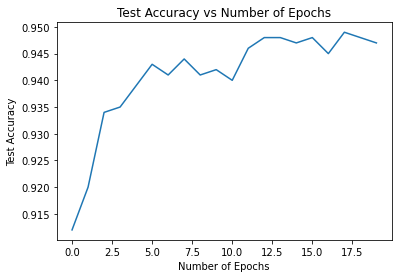

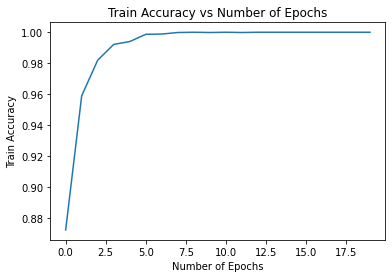

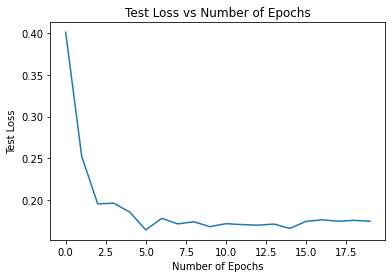

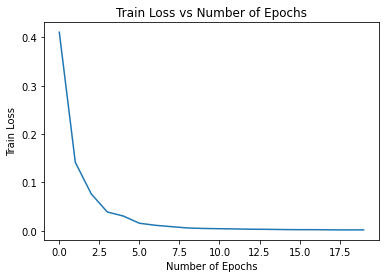

In [12]:
# (i) test accuracy vs the number of epochs (say 3 ∼ 5)
plt.plot(history.history['val_accuracy'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (ii) training accuracy vs the number of epochs
plt.plot(history.history['accuracy'])
plt.title('Train Accuracy vs Number of Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (iii) test loss vs the number of epochs
plt.plot(history.history['val_loss'])
plt.title('Test Loss vs Number of Epochs')
plt.ylabel('Test Loss')
plt.xlabel('Number of Epochs')
plt.show()
# (iv) training loss vs the number of epochs
plt.plot(history.history['loss'])
plt.title('Train Loss vs Number of Epochs')
plt.ylabel('Train Loss')
plt.xlabel('Number of Epochs')
plt.show()

#### Part 3 Comparison

##### VGG11 is better for MNIST classification due to the higher accuracies. The main cause is that when flattening the image, spatial information may be lost. Also, since each node is connected to every other node, there could be redundancy and inefficiency. 

#### Part 4 Bonus

In [13]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, BatchNormalization, Activation
model4 = Sequential()
model4.add(Dense(512, activation='relu', input_shape=(784,)))
model4.add(Dense(512))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dense(512))
model4.add(BatchNormalization())
model4.add(Activation('relu'))
model4.add(Dense(10, activation="softmax"))
model4.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 512)               401920    
                                                                 
 dense_8 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_2 (Batc  (None, 512)              2048      
 hNormalization)                                                 
                                                                 
 activation_1 (Activation)   (None, 512)               0         
                                                                 
 dense_9 (Dense)             (None, 512)               262656    
                                                                 
 batch_normalization_3 (Batc  (None, 512)              2048      
 hNormalization)                                      

In [14]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model4.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])

In [18]:
history4 = model4.fit(newX_train[:6000], Y_train[:6000], batch_size=32, validation_data=(newX_test[:1000],Y_test[:1000]), epochs=20, verbose=1)
model4.evaluate(newX_test[:1000], Y_test[:1000], batch_size=32)

Epoch 1/20
188/188 [==============================] - 4s 13ms/step - loss: 0.3957 - accuracy: 0.8790 - val_loss: 0.4889 - val_accuracy: 0.8590
Epoch 2/20
188/188 [==============================] - 3s 14ms/step - loss: 0.1315 - accuracy: 0.9597 - val_loss: 0.2376 - val_accuracy: 0.9230
Epoch 3/20
188/188 [==============================] - 3s 14ms/step - loss: 0.0645 - accuracy: 0.9805 - val_loss: 0.2064 - val_accuracy: 0.9350
Epoch 4/20
188/188 [==============================] - 2s 13ms/step - loss: 0.0372 - accuracy: 0.9910 - val_loss: 0.1735 - val_accuracy: 0.9410
Epoch 5/20
188/188 [==============================] - 2s 13ms/step - loss: 0.0196 - accuracy: 0.9960 - val_loss: 0.1768 - val_accuracy: 0.9450
Epoch 6/20
188/188 [==============================] - 2s 13ms/step - loss: 0.0141 - accuracy: 0.9980 - val_loss: 0.1812 - val_accuracy: 0.9480
Epoch 7/20
188/188 [==============================] - 3s 13ms/step - loss: 0.0091 - accuracy: 0.9985 - val_loss: 0.1643 - val_accuracy: 0.9490

[0.1702343374490738, 0.953000009059906]

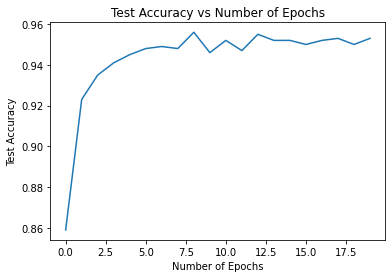

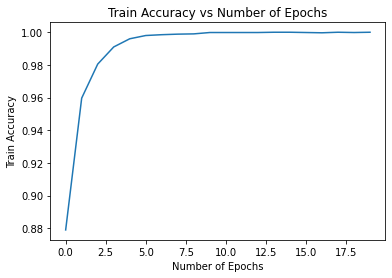

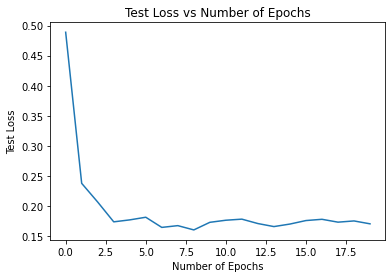

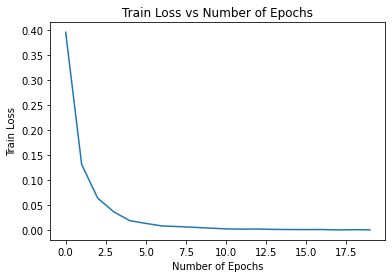

In [19]:
# (i) test accuracy vs the number of epochs (say 3 ∼ 5)
plt.plot(history4.history['val_accuracy'])
plt.title('Test Accuracy vs Number of Epochs')
plt.ylabel('Test Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (ii) training accuracy vs the number of epochs
plt.plot(history4.history['accuracy'])
plt.title('Train Accuracy vs Number of Epochs')
plt.ylabel('Train Accuracy')
plt.xlabel('Number of Epochs')
plt.show()
# (iii) test loss vs the number of epochs
plt.plot(history4.history['val_loss'])
plt.title('Test Loss vs Number of Epochs')
plt.ylabel('Test Loss')
plt.xlabel('Number of Epochs')
plt.show()
# (iv) training loss vs the number of epochs
plt.plot(history4.history['loss'])
plt.title('Train Loss vs Number of Epochs')
plt.ylabel('Train Loss')
plt.xlabel('Number of Epochs')
plt.show()

#### The second network performs better. By adding the additional layer, the depth is increased. In the meanwhile, the model capacity is increased and thus allows for more successful training.

In [20]:
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf import colab_pdf
colab_pdf('Ex2.ipynb')

File ‘colab_pdf.py’ already there; not retrieving.





[NbConvertApp] Converting notebook /content/drive/MyDrive/Colab Notebooks/Ex2.ipynb to pdf
[NbConvertApp] Support files will be in Ex2_files/
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Making directory ./Ex2_files
[NbConvertApp] Writing 49913 bytes to ./notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: [u'xelatex', u'./notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: [u'bibtex', u'./notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 126395 bytes to /content/drive/My Drive/Ex2.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

'File ready to be Downloaded and Saved to Drive'